In [1]:
#Neural Networks_classifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import f1_score as f1Score
import os

In [2]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [3]:
dataset


,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,0,219.0
1,45,male,yes,64,121/72,0,248.0
2,58,male,yes,81,127.5/76,0,235.0
3,42,male,yes,90,122.5/80,0,225.0
4,42,male,yes,62,119/80,0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60,254.0
3896,49,male,yes,70,123/75,60,213.0
3897,56,male,yes,70,125/79,60,246.0
3898,50,male,yes,85,134/95,60,340.0


In [4]:
def categorize_cholesterol(value):
    if value < 200:
        return 1
    elif 200 <= value < 248:
        return 2
    else:
        return 3

In [5]:
dataset = dataset.fillna(0)

if 'chol' in dataset.columns:
   
    dataset['chol'] = pd.to_numeric(dataset['chol'], errors='coerce')  # Convert to numeric, set invalid to NaN
    dataset['chol'] = dataset['chol'].fillna(0) 

    dataset['target'] = dataset['chol'].apply(categorize_cholesterol)


In [6]:

dataset['target'] = dataset['chol'].apply(categorize_cholesterol)
X = dataset.drop(['chol', 'target'], axis=1)
Y = dataset['target'] 
#dataset

In [7]:
dataset = dataset.fillna(0)

if 'blood_pressure' in dataset.columns:
    dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
    dataset['blood_pressure_systolic'] = pd.to_numeric(dataset['blood_pressure_systolic'], errors='coerce').fillna(0)
    dataset['blood_pressure_diastolic'] = pd.to_numeric(dataset['blood_pressure_diastolic'], errors='coerce').fillna(0)
    dataset = dataset.drop(['blood_pressure'], axis=1)

In [8]:
dataset = pd.get_dummies(dataset, columns=['sex'])
dataset = pd.get_dummies(dataset, columns=['current_smoker'])

In [9]:

dataset = dataset.drop(['chol', 'target'], axis=1)
print(dataset.head())




   age  heart_rate  cigs_per_day  blood_pressure_systolic  \
0   54          95             0                    110.0   
1   45          64             0                    121.0   
2   58          81             0                    127.5   
3   42          90             0                    122.5   
4   42          62             0                    119.0   

   blood_pressure_diastolic  sex_female  sex_male  current_smoker_no  \
0                      72.0       False      True              False   
1                      72.0       False      True              False   
2                      76.0       False      True              False   
3                      80.0       False      True              False   
4                      80.0       False      True              False   

   current_smoker_yes  
0                True  
1                True  
2                True  
3                True  
4                True  


In [10]:
dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})
dataset['current_smoker_no'] = dataset['current_smoker_no'].replace({True: 1, False: 0})
dataset['current_smoker_yes'] = dataset['current_smoker_yes'].replace({True: 1, False: 0})
dataset

,age,heart_rate,cigs_per_day,blood_pressure_systolic,blood_pressure_diastolic,sex_female,sex_male,current_smoker_no,current_smoker_yes
0,54,95,0,110.0,72.0,0,1,0,1
1,45,64,0,121.0,72.0,0,1,0,1
2,58,81,0,127.5,76.0,0,1,0,1
3,42,90,0,122.5,80.0,0,1,0,1
4,42,62,0,119.0,80.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
3895,37,88,60,122.5,82.5,0,1,0,1
3896,49,70,60,123.0,75.0,0,1,0,1
3897,56,70,60,125.0,79.0,0,1,0,1
3898,50,85,60,134.0,95.0,0,1,0,1


In [11]:
X= dataset

In [12]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()


X = mmScaler.fit_transform(X.astype(float))


In [13]:
test_size1 = 0.2
random_state1 = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1, random_state=random_state1 )

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
mlp_sklearn = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=0)

mlp_sklearn.fit(X_train, Y_train)


Y_pred = mlp_sklearn.predict(X_test)
mlp_accuracy = accuracy_score(Y_test, Y_pred)

In [16]:
mlp_accuracy = accuracy_score(Y_test, Y_pred)
print("MLP Classifier Accuracy:", mlp_accuracy)
print("MLP Classifier Classification Report:\n", classification_report(Y_test, Y_pred))
print("MLP Classifier Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))

MLP Classifier Accuracy: 0.4756410256410256
MLP Classifier Classification Report:
               precision    recall  f1-score   support

           1       0.39      0.27      0.32       168
           2       0.47      0.61      0.53       322
           3       0.53      0.45      0.49       290

    accuracy                           0.48       780
   macro avg       0.46      0.44      0.44       780
weighted avg       0.47      0.48      0.47       780

MLP Classifier Confusion Matrix:
 [[ 45  87  36]
 [ 49 195  78]
 [ 22 137 131]]


In [17]:
X_scaled = scaler.fit_transform(X)
cross_val_scores = cross_val_score(mlp_sklearn, X_scaled, Y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Cross-Validation Scores: [0.42179487 0.47179487 0.42179487 0.4025641  0.38076923]
Average Cross-Validation Score: 0.4197435897435898


In [18]:


#model = Sequential()

#model = Sequential()
#model.add(Dense(64, activation='relu', input_shape=(9,)))  # Adjust input_shape for 9 features
#model.add(Dense(32, activation='relu'))
#odel.add(Dense(10, activation='softmax'))


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
print("Added first Dense layer")
model.add(Dense(32, activation='relu'))
print("Added second Dense layer")
model.add(Dense(10, activation='softmax'))
print("Added output Dense layer")


Added first Dense layer
Added second Dense layer
Added output Dense layer


C:\Users\mmerk\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:

#model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

#adam, adamw, adagrad, rmsprop, adadelta, nadam


optimizer1 = 'adam'
loss1 = 'sparse_categorical_crossentropy'  # For multi-class classification with integer labels
metrics1 = ['accuracy']  # To evaluate classification performance


model.compile(optimizer=optimizer1, loss=loss1, metrics=metrics1)

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3862 - loss: 1.6749 - val_accuracy: 0.4872 - val_loss: 1.0521
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4722 - loss: 1.0360 - val_accuracy: 0.4923 - val_loss: 1.0117
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4888 - loss: 0.9961 - val_accuracy: 0.5000 - val_loss: 1.0079
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5110 - loss: 0.9613 - val_accuracy: 0.4910 - val_loss: 1.0038
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.4900 - loss: 0.9889 - val_accuracy: 0.4987 - val_loss: 1.0061
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5099 - loss: 0.9791 - val_accuracy: 0.5064 - val_loss: 1.0053
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5002 - loss: 0.9770 - val_accuracy: 0.4974 - val_loss: 1.0049
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.5010 - loss: 0.9656 - val_accuracy: 0.5013

In [34]:
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_test shape: (780, 9)
Y_test shape: (780,)


In [35]:
val_loss, val_acc = model.evaluate(X_test, Y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step - accuracy: 0.4779 - loss: 1.0319


In [36]:
predictions = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [37]:

#model.fit(X_train, Y_train, epochs=50, batch_size=32, validation_split=0.2) #!!!!!!!!!!epochs=50, batch_size=32

model.fit(X_train, Y_train, epochs=30, batch_size=16, validation_split=0.2)  # Reduced epochs, smaller batch size


Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5519 - loss: 0.9096 - val_accuracy: 0.5673 - val_loss: 0.9162
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.5462 - loss: 0.9139 - val_accuracy: 0.5689 - val_loss: 0.9146
Epoch 3/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - accuracy: 0.5396 - loss: 0.9238 - val_accuracy: 0.5449 - val_loss: 0.9264
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 926us/step - accuracy: 0.5443 - loss: 0.9079 - val_accuracy: 0.5481 - val_loss: 0.9226
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.5415 - loss: 0.9141 - val_accuracy: 0.5657 - val_loss: 0.9282
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - accuracy: 0.5675 - loss: 0.9009 - val_accuracy: 0.5337 - val_loss: 0.9368
Epoch 7/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.5598 - loss: 0.9065 - val_accuracy: 0.5529 - val_loss: 0.9409
Epoch 8/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.5495 - loss: 0.9009 - va

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_sklearn, X, Y, cv=5)  
print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

Cross-Validation Scores: [0.50769231 0.47948718 0.45769231 0.41666667 0.4474359 ]
Average Cross-Validation Score: 0.46179487179487183


In [39]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("Neural Network Accuracy:", accuracy)

Neural Network Accuracy: 0.44871795177459717


In [40]:
Y_pred = mlp_sklearn.predict(X_test)

In [41]:
predictions = Y_pred

In [42]:
print(predictions)

[3 3 2 1 2 3 2 1 3 1 2 2 3 2 3 2 2 3 3 2 3 2 3 2 2 2 2 3 3 3 1 1 2 2 3 2 2
 3 2 2 2 2 3 1 2 2 3 3 2 2 3 2 1 2 2 2 1 1 2 2 3 2 2 3 1 1 3 2 2 3 2 2 2 2
 3 2 2 3 2 2 1 2 3 1 3 1 3 3 2 2 2 2 3 2 2 2 3 3 2 1 2 2 3 2 2 1 3 1 2 2 1
 2 1 3 2 2 3 2 2 3 2 3 3 3 2 1 1 3 3 2 1 1 2 2 1 3 2 1 2 3 2 2 2 2 2 3 3 3
 3 2 3 3 3 3 1 1 3 2 3 2 1 3 2 3 3 2 2 2 2 3 1 2 3 2 2 1 2 2 2 2 2 2 2 3 2
 2 2 2 2 3 3 2 3 2 2 2 3 2 3 2 3 2 3 3 3 1 2 3 1 1 2 2 1 3 2 1 3 3 2 1 1 2
 3 2 2 2 3 2 3 3 1 3 2 2 1 1 2 3 2 3 3 2 2 2 2 3 1 3 2 3 2 2 1 2 3 3 2 2 2
 2 2 2 2 2 2 1 3 2 2 2 3 2 1 3 2 1 2 2 2 2 2 1 1 3 3 1 2 2 2 2 1 3 3 2 3 2
 2 2 2 2 1 2 3 2 3 2 2 2 3 2 1 2 2 2 3 2 3 2 2 2 2 2 2 3 2 2 3 3 2 3 1 2 2
 2 1 2 3 2 2 2 2 2 3 3 1 1 1 2 3 2 3 2 3 2 3 2 2 2 2 1 3 3 3 3 3 2 2 2 2 3
 3 2 3 3 2 2 3 3 2 3 2 2 3 2 1 3 3 3 2 1 3 2 2 3 2 1 1 1 3 2 1 2 3 1 2 3 2
 3 3 2 2 2 3 2 3 2 3 2 2 2 1 2 3 1 3 2 3 3 2 3 1 2 2 2 2 3 2 2 1 1 2 3 2 1
 3 1 3 2 2 2 3 2 2 2 2 3 2 3 3 2 3 2 2 2 3 2 1 1 3 2 1 2 3 3 1 1 2 1 3 3 3
 1 3 3 2 2 2 3 3 2 2 1 3 

In [43]:
 



Y_predList = []
for i in range(len(Y_pred)):  # Iterate over the length of Y_pred, not X_test
    print("Y_pred:", Y_pred[i], "actual:", Y_test.iloc[i])  # Print the predictions and actual values
    Y_predList.append(Y_pred[i])


Y_pred: 3 actual: 2
Y_pred: 3 actual: 3
Y_pred: 2 actual: 2
Y_pred: 1 actual: 1
Y_pred: 2 actual: 3
Y_pred: 3 actual: 2
Y_pred: 2 actual: 2
Y_pred: 1 actual: 2
Y_pred: 3 actual: 3
Y_pred: 1 actual: 1
Y_pred: 2 actual: 2
Y_pred: 2 actual: 2
Y_pred: 3 actual: 2
Y_pred: 2 actual: 3
Y_pred: 3 actual: 3
Y_pred: 2 actual: 2
Y_pred: 2 actual: 1
Y_pred: 3 actual: 3
Y_pred: 3 actual: 2
Y_pred: 2 actual: 1
Y_pred: 3 actual: 1
Y_pred: 2 actual: 2
Y_pred: 3 actual: 3
Y_pred: 2 actual: 2
Y_pred: 2 actual: 2
Y_pred: 2 actual: 2
Y_pred: 2 actual: 2
Y_pred: 3 actual: 3
Y_pred: 3 actual: 3
Y_pred: 3 actual: 3
Y_pred: 1 actual: 3
Y_pred: 1 actual: 2
Y_pred: 2 actual: 1
Y_pred: 2 actual: 1
Y_pred: 3 actual: 3
Y_pred: 2 actual: 3
Y_pred: 2 actual: 2
Y_pred: 3 actual: 3
Y_pred: 2 actual: 2
Y_pred: 2 actual: 2
Y_pred: 2 actual: 3
Y_pred: 2 actual: 1
Y_pred: 3 actual: 3
Y_pred: 1 actual: 2
Y_pred: 2 actual: 2
Y_pred: 2 actual: 2
Y_pred: 3 actual: 3
Y_pred: 3 actual: 3
Y_pred: 2 actual: 2
Y_pred: 2 actual: 3


In [44]:
Y_pred = pd.DataFrame(Y_predList)

In [47]:
recall = recall_score(Y_test, predictions, average='weighted', zero_division=0)
print("Recall:", recall)


Recall: 0.4756410256410256


In [48]:
report = classification_report(Y_test, Y_pred, output_dict=True, zero_division=0)

categories = list(report.keys())[:-3] 

precision = [report[str(category)]['precision'] for category in categories]  # Convert to string if needed
recall = [report[str(category)]['recall'] for category in categories]
#f1_score = [report[str(category)]['f1-score'] for category in categories]
f1_score = [report[cat]['f1-score'] for cat in categories]

support = [report[str(category)]['support'] for category in categories]

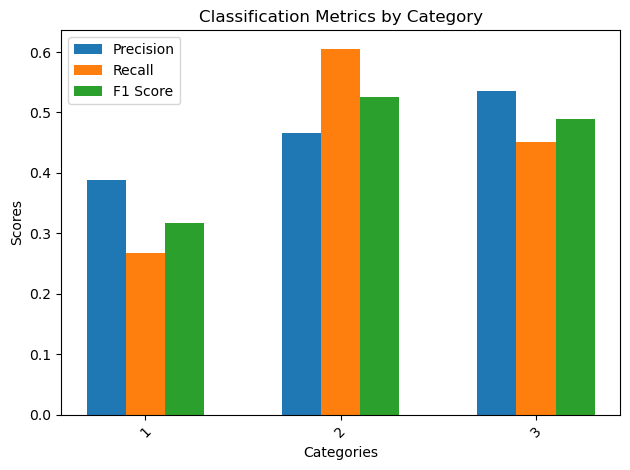

In [49]:

fig, ax = plt.subplots()
x = range(len(categories))
width = 0.2 

bar1 = ax.bar([i - width for i in x], precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar([i + width for i in x], f1_score, width, label='F1 Score')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [50]:
'''
The chart shows three metrics—precision (blue), recall (orange), and F1-score (green)—for
three categories (1, 2, and 3). The statement about Category 3 having 
the highest scores is not accurate; Category 2 has the highest recall 
(orange bar), and its F1-score (green bar) is also relatively high. 
he precision for Category 3 (blue bar) appears slightly higher compared
to Category 2. Category 1 has noticeably lower scores across all metrics,
consistent with the description. To improve the statement, clarify that
while category 3 has good precision, category 2 excels in recall and
overall balance (F1-score)The chart shows three metrics—precision (blue), 
recall (orange), and F1-score (green)—for three categories (1, 2, and 3).
The statement about Category 3 having the highest scores is not accurate; 
Category 2 has the highest recall (orange bar), and its F1-score (green bar)
is also relatively high. The precision for Category 3 (blue bar) appears 
slightly higher compared to Category 2. Category 1 has noticeably lower 
scores across all metrics, consistent with the description. 
o improve the statement, clarify that while category 3 has good precision, 
category 2 excels in recall and overall balance (F1-score) 
'''

'\nThe chart shows three metrics—precision (blue), recall (orange), and F1-score (green)—for\nthree categories (1, 2, and 3). The statement about Category 3 having \nthe highest scores is not accurate; Category 2 has the highest recall \n(orange bar), and its F1-score (green bar) is also relatively high. \nhe precision for Category 3 (blue bar) appears slightly higher compared\nto Category 2. Category 1 has noticeably lower scores across all metrics,\nconsistent with the description. To improve the statement, clarify that\nwhile category 3 has good precision, category 2 excels in recall and\noverall balance (F1-score)The chart shows three metrics—precision (blue), \nrecall (orange), and F1-score (green)—for three categories (1, 2, and 3).\nThe statement about Category 3 having the highest scores is not accurate; \nCategory 2 has the highest recall (orange bar), and its F1-score (green bar)\nis also relatively high. The precision for Category 3 (blue bar) appears \nslightly higher compa

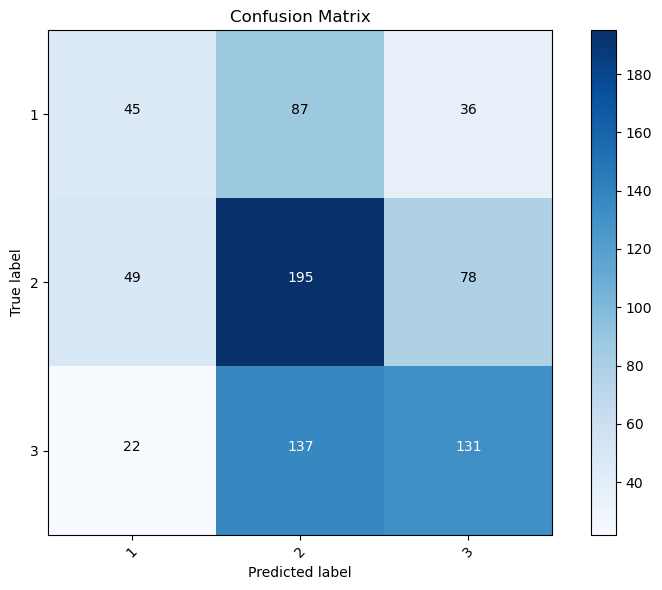

In [51]:
# Compute confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks for classes
categories = np.unique(Y_test)  # Ensure categories are derived from the data
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)

# Add numerical values to the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [52]:
'''
Confusion matrix visualizes the performance of a Neural Networks_classifier model 
across three classes: 1, 2, and 3. The rows represent the true labels, 
while the columns represent the predicted labels. Diagonal values 
(e.g., 31 for class 1, 197 for class 2, and 119 for class 3) 
indicate correct predictions. Off-diagonal values represent 
misclassifications, such as 105 instances of class 1 being misclassified 
s class 2 and 154 instances of class 3 being misclassified as class 2.
Class 2 has the highest correct predictions (197),
but it also shows a substantial number of misclassifications into other classes. 
Overall, the confusion matrix highlights that the model performs best for class 2
but struggles with misclassifications, especially between class 1 and class 2 and between class 3 and class 2.
'''

'\nConfusion matrix visualizes the performance of a Neural Networks_classifier model \nacross three classes: 1, 2, and 3. The rows represent the true labels, \nwhile the columns represent the predicted labels. Diagonal values \n(e.g., 31 for class 1, 197 for class 2, and 119 for class 3) \nindicate correct predictions. Off-diagonal values represent \nmisclassifications, such as 105 instances of class 1 being misclassified \ns class 2 and 154 instances of class 3 being misclassified as class 2.\nClass 2 has the highest correct predictions (197),\nbut it also shows a substantial number of misclassifications into other classes. \nOverall, the confusion matrix highlights that the model performs best for class 2\nbut struggles with misclassifications, especially between class 1 and class 2 and between class 3 and class 2.\n'

In [53]:
from sklearn.metrics import precision_score

pre_score = precision_score(Y_test, Y_pred, average='weighted')
print("Precision Score (Weighted):", pre_score)

Precision Score (Weighted): 0.47447492332334257


In [54]:
from sklearn.metrics import recall_score

In [55]:
print("Type of f1_score:", type(f1_score))

Type of f1_score: <class 'list'>


In [56]:
accuracy_result = accuracy_score(Y_test, Y_pred)
precision_result = precision_score(Y_test, Y_pred, average='weighted')

print(f1_score)
recall_result1 = recall_score(Y_test, Y_pred, average='weighted')
f1_result = f1Score(Y_test, Y_pred, average='weighted')

[0.31690140845070425, 0.5263157894736842, 0.4897196261682243]


In [57]:
accuracy_result = accuracy_score(Y_test, Y_pred)
precision_result = precision_score(Y_test, Y_pred, average='weighted')

print(f1_score)
recall_result1 = recall_score(Y_test, Y_pred, average='weighted')
f1_result = f1Score(Y_test, Y_pred, average='weighted')

[0.31690140845070425, 0.5263157894736842, 0.4897196261682243]


In [220]:
'''data = {
    "Test_Size": test_size1,
    "random_state": random_state1,
    "accuracy": accuracy_result
}'''

'data = {\n    "Test_Size": test_size1,\n    "random_state": random_state1,\n    "accuracy": accuracy_result\n}'

In [221]:
report = classification_report(Y_test, Y_pred, output_dict=True)

column_order = [
    "Test_Size", "random_state", "accuracy",
    "1_precision", "1_recall", "1_f1-score", "1_support",
    "2_precision", "2_recall", "2_f1-score", "2_support",
    "3_precision", "3_recall", "3_f1-score", "3_support",
    "macro avg_precision", "macro avg_recall", "macro avg_f1-score",
    "weighted avg_precision", "weighted avg_recall", "weighted avg_f1-score",
]

# Flatten metrics to match the column order
flattened_metrics = {}
flattened_metrics["Test_Size"] = test_size1  # Ensure this is defined
flattened_metrics["random_state"] = random_state1  # Ensure this is defined
flattened_metrics["accuracy"] = report.get("accuracy", None)

# Loop through labels and metrics to extract values
for label in ["1", "2", "3", "macro avg", "weighted avg"]:
    for metric in ["precision", "recall", "f1-score", "support"]:
        column_name = f"{label}_{metric.replace(' ', '_')}"
        flattened_metrics[column_name] = report.get(label, {}).get(metric, None)

# Convert the flattened dictionary into a DataFrame
final_report_df = pd.DataFrame([flattened_metrics])

# Ensure the columns are in the correct order
for col in column_order:
    if col not in final_report_df.columns:
        final_report_df[col] = None  # Add missing columns with NaN

final_report_df = final_report_df[column_order]  # Reorder columns

# Save to CSV
csv_file = "Neural_Networks_Classifier_Resultsaabbbbbbbbbbbbbbbbbbb.csv"

if os.path.isfile(csv_file):
    existing_df = pd.read_csv(csv_file)
    if not existing_df.equals(final_report_df):
        final_report_df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    final_report_df.to_csv(csv_file, mode='w', header=True, index=False)

